<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.6_ttest/stats_ttest_oneSampleT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: The t-test family
# One-sample t-test

In [33]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

0.7683276764614286


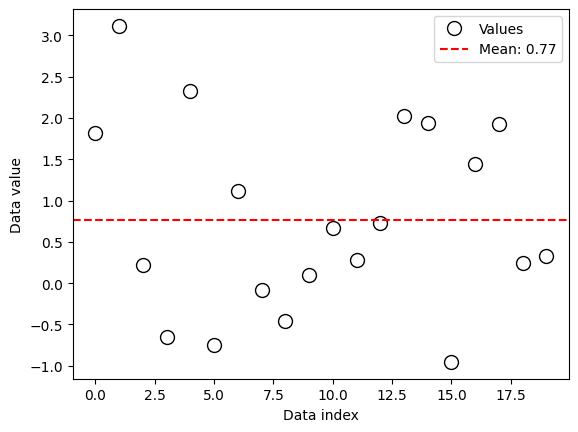

In [ ]:
## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data = np.random.randn(N) + popMu
# calculate the mean of the data
mean_value = np.mean(data)
print(mean_value)

# let's see what the data look(s) like
# plt.plot(data,'ko-',markerfacecolor='w',markersize=10, label='Values') # plot with line
plt.plot(data,'ko',markerfacecolor='w',markersize=10, label='Values')
# add a horizontal line for the mean
plt.axhline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

plt.xlabel('Data index')
plt.ylabel('Data value')
# add legend to show the mean value
plt.legend()

plt.show()

### question: Should there be lines in this plot?
### answer: NO, because these are just unconnected numbers. This is not a time series.

19


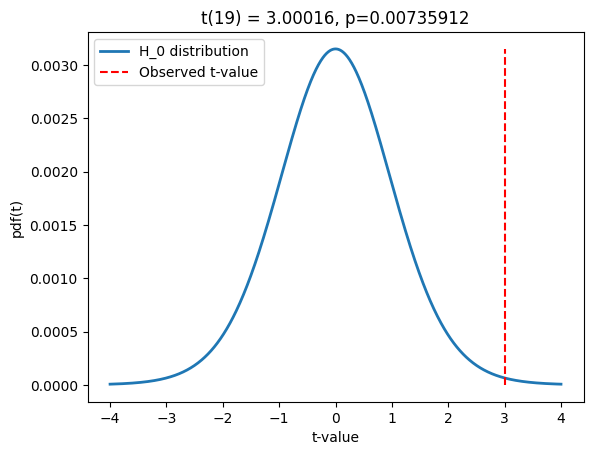

In [ ]:
## "manual" t-test

# the null-hypothesis value
H0val = 0  # Define the null hypothesis value, which is the mean we're testing against (here, we test if the mean is 0).

# compute the t-value
t_num = np.mean(data) - H0val  # Calculate the numerator: the difference between the sample mean and the null hypothesis value.
# t_den = np.std(data) / np.sqrt(N)  # Calculate the denominator: the standard error of the sample mean.
t_den = np.std(data, ddof=1) / np.sqrt(N)
tval = t_num / t_den  # Calculate the t-value by dividing the numerator by the denominator.

# degrees of freedom
df = N - 1  # Calculate the degrees of freedom for the t-test, which is the sample size minus 1.
print(df)

# p-value
# pval = 1 - stats.t.cdf(abs(tval), df)  # Calculate the p-value using the cumulative distribution function (CDF) of the t-distribution.
# two-tailed p-value
pval = 2 * (1 - stats.t.cdf(abs(tval), df))

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4, 4, 1001)  # Create an array of t-values ranging from -4 to 4 for plotting the t-distribution.
tdist = stats.t.pdf(x, df) * np.mean(np.diff(x))  # Calculate the probability density function (PDF) of the t-distribution.

# Plot the t-distribution
plt.plot(x, tdist, linewidth=2)  # Plot the t-distribution curve.
plt.plot([tval, tval], [0, max(tdist)], 'r--')  # Plot a vertical dashed line at the observed t-value for visualization.
plt.legend(('H_0 distribution', 'Observed t-value'))  # Add a legend to differentiate between the t-distribution and the observed t-value.
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g' % (df, tval, pval))

plt.show()


In [ ]:
## now using the Python function

t,p = stats.ttest_1samp(data,H0val)

print(t,p)
# do these values match our manually computed values?

3.000159712908172 0.007359121330586142


---
The role of variance
---

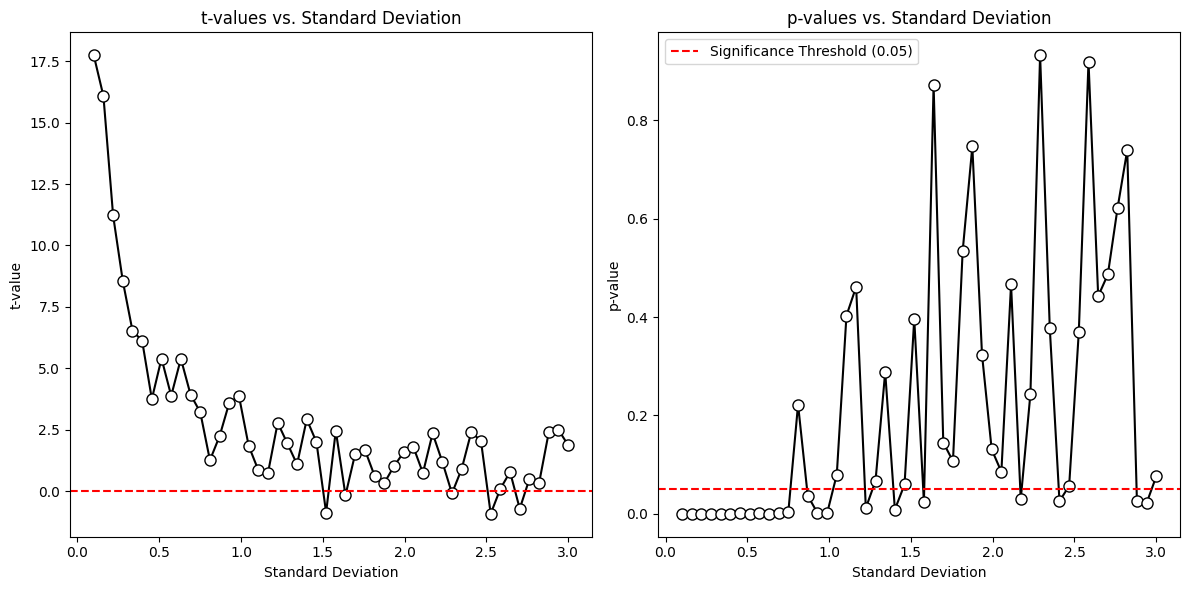

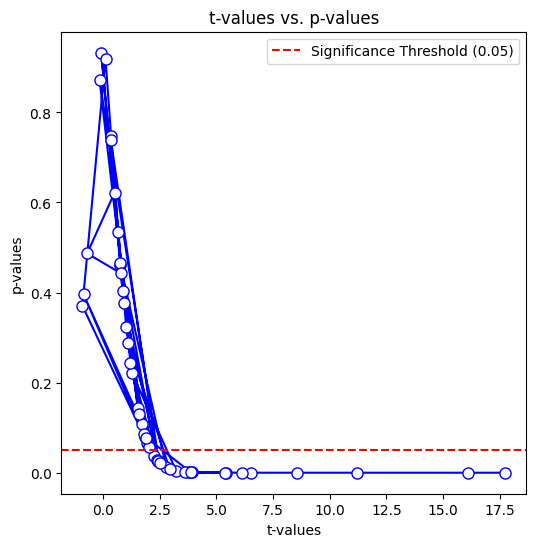

In [34]:

# Parameters
N = 20  # sample size
popMu = 0.5  # true population mean
std_devs = np.linspace(0.1, 3, 50)  # range of standard deviations (0.1 to 3)

# Arrays to store t-values and p-values for each standard deviation
t_vals = np.zeros(len(std_devs))
p_vals = np.zeros(len(std_devs))

# Null hypothesis value
H0val = 0  # testing against population mean of 0

# Loop through different standard deviations
for i, std_dev in enumerate(std_devs):

    # Generate data with the current standard deviation and the same population mean
    data = np.random.randn(N) * std_dev + popMu

    # Perform a one-sample t-test against the null hypothesis mean (H0val)
    t, p = stats.ttest_1samp(data, H0val)

    # Store the computed t and p values
    t_vals[i] = t
    p_vals[i] = p

# Plot the t-values against the standard deviation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(std_devs, t_vals, 'ko-', markerfacecolor='w', markersize=8)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Standard Deviation')
plt.ylabel('t-value')
plt.title('t-values vs. Standard Deviation')

# Plot the p-values against the standard deviation
plt.subplot(1, 2, 2)
plt.plot(std_devs, p_vals, 'ko-', markerfacecolor='w', markersize=8)
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Standard Deviation')
plt.ylabel('p-value')
plt.title('p-values vs. Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

# Plot t-values vs. p-values
plt.figure(figsize=(6,6))
plt.plot(t_vals, p_vals, 'bo-', markerfacecolor='w', markersize=8)
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('t-values')
plt.ylabel('p-values')
plt.title('t-values vs. p-values')
plt.legend()

plt.show()
